# Introduction

Stationarity is a fundamental concept in time series analysis that determines whether the statistical properties of a dataset such as **mean, variance, and autocorrelation** remain constant over time.
 Many time series models, including **ARIMA** and **SARIMA**, rely on this assumption to make accurate predictions.

In this article, we’ll explore the concept of stationarity, why it is essential, and how to visualize and test for it.

**note:** We assume that you are already familiar with these concepts
- Line Plot
- ACF and PACF Analysis
- Rolling Statistics
- Augmented Dickey-Fuller (ADF) test

# What Is Stationarity in Time Series?
Stationarity refers to a time series whose statistical properties **(mean, variance, and autocorrelation)** do not change over time.

**Key Characteristics:**

- Constant mean.
- Constant variance.
- Constant autocorrelation structure (no trends or seasonality).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

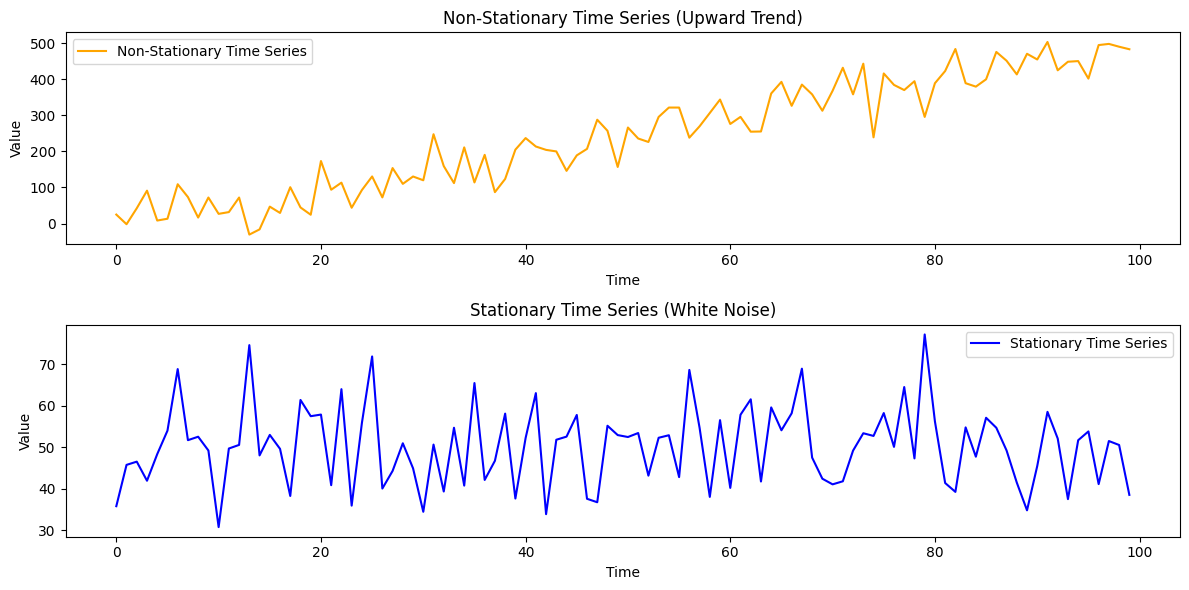

In [2]:
# Generate Non-Stationary Time Series (e.g., a time series with an upward trend)
np.random.seed(42)
time = np.arange(0, 100)
non_stationary = 5 * time + np.random.normal(scale=50, size=100)  # Linear trend + noise

# Generate Stationary Time Series (e.g., white noise)
stationary = np.random.normal(loc=50, scale=10, size=100)  # Constant mean and variance

# Create a DataFrame for easy handling
time_series_data = pd.DataFrame({
    'Time': time,
    'Non-Stationary': non_stationary,
    'Stationary': stationary
})

# Plot Non-Stationary Time Series
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_series_data['Time'], time_series_data['Non-Stationary'], label='Non-Stationary Time Series', color='orange')
plt.title("Non-Stationary Time Series (Upward Trend)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

# Plot Stationary Time Series
plt.subplot(2, 1, 2)
plt.plot(time_series_data['Time'], time_series_data['Stationary'], label='Stationary Time Series', color='blue')
plt.title("Stationary Time Series (White Noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()

# Why Is Stationarity Important in Time Series Analysis?

Stationarity ensures that the statistical properties of the data (like mean and variance) remain constant over time. This consistency makes it easier to understand, model, and forecast the data accurately. Here's why it matters:

**1. Simplifies Modeling**
- Non-stationary data, with changing trends or variance, can lead to misleading relationships between variables.
- Stationary data ensures that models like ARIMA focus on capturing meaningful patterns rather than chasing trends or seasonality.

**2. Enhances Interpretability**

- Stationary data allows you to identify meaningful patterns without being distracted by long-term trends or seasonal fluctuations.
- It becomes easier to isolate behaviors like recurring patterns or anomalies.

**Meets Statistical Assumptions**

- Many statistical models and tests (e.g., ARIMA, ADF test, Granger causality) assume that data is stationarity.
- Non-stationary data can violate these assumptions, leading to inaccurate forecasts or invalid test results.


## Real-Life Example: Stock Price Analysis

Stock prices are typically non-stationary because they show long-term trends, such as consistent growth over time due to economic factors. However, analyzing raw stock prices can be misleading for short-term forecasting or understanding market behavior.

**Solution: Use Daily Stock Returns**

- Instead of analyzing raw prices, calculate daily stock returns (percentage change in prices), which are stationary.
- Daily returns fluctuate around a constant mean with relatively stable variance, making them suitable for models like ARIMA or volatility analysis.

**Why It Matters?**

By focusing on stationary daily returns, you can:
- Identify short-term market trends.
- Analyze volatility without being distracted by the long-term upward trend in stock prices.
- This approach helps financial analysts and traders make informed decisions about market movements.

# Datasets
Here are we generate two datasets: one is non-stationary, and the other is stationary.

## Non-Stationary Dataset
- Represents monthly sales data from January 2010 to December 2020.
- Includes a linear upward trend (typical for non-stationary data) with random noise.

In [3]:
# Generate Non-Stationary Dataset: Monthly Sales Data with Trend
np.random.seed(42)
dates_non_stationary = pd.date_range(start="2010-01-01", end="2020-12-01", freq="MS")
sales = np.linspace(100, 1000, len(dates_non_stationary)) + np.random.normal(scale=50, size=len(dates_non_stationary))
non_stationary_data = pd.DataFrame({"Date": dates_non_stationary, "Sales": sales})
non_stationary_data.head()

,Date,Sales
0,2010-01-01,124.835708
1,2010-02-01,99.957014
2,2010-03-01,146.124885
3,2010-04-01,196.762180
4,2010-05-01,115.773247


## Stationary Dataset
- Represents daily temperature anomalies (differences from the average) for the year 2020.
- Values are generated with a constant mean (0) and constant variance (2), making it stationary.


In [4]:
# Generate Stationary Dataset: Daily Temperature Anomalies (Stationary)
dates_stationary = pd.date_range(start="2020-01-01", end="2020-12-31", freq="D")
temperature_anomalies = np.random.normal(loc=0, scale=2, size=len(dates_stationary))
stationary_data = pd.DataFrame({"Date": dates_stationary, "TempAnomalies": temperature_anomalies})

stationary_data.head()

,Date,TempAnomalies
0,2020-01-01,-2.124607
1,2020-01-02,0.947185
2,2020-01-03,-1.838848
3,2020-01-04,3.099869
4,2020-01-05,-1.566507


# Techniques to evaluate Stationary data

## Visualization Techniques for Stationarity Analysis
It's time To determine whether datasets are stationary or non-stationary, we can use several visualization techniques.
These techniques include:
- Line Plot
- ACF/PACF
- Rolling Statistics

### Line Plot

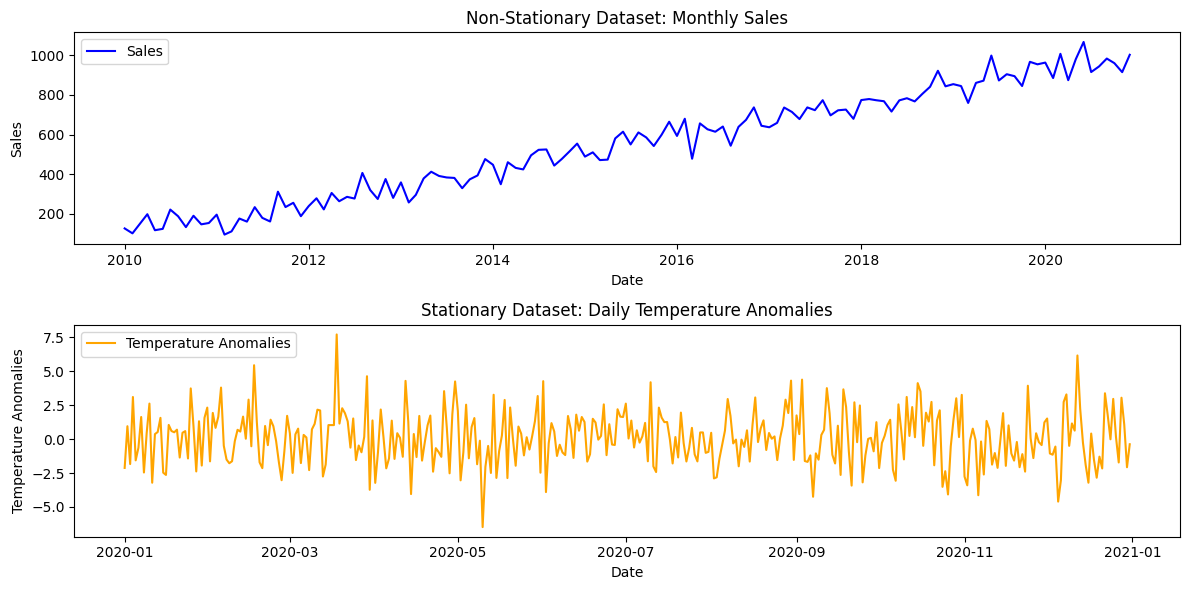

In [5]:
# Plot Line Plots for Both Datasets
plt.figure(figsize=(12, 6))

# Non-Stationary Dataset
plt.subplot(2, 1, 1)
plt.plot(non_stationary_data['Date'], non_stationary_data['Sales'], label='Sales', color='blue')
plt.title('Non-Stationary Dataset: Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Stationary Dataset
plt.subplot(2, 1, 2)
plt.plot(stationary_data['Date'], stationary_data['TempAnomalies'], label='Temperature Anomalies', color='orange')
plt.title('Stationary Dataset: Daily Temperature Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature Anomalies')
plt.legend()

plt.tight_layout()
plt.show()

#### Insights

**1. Non-Stationary Dataset (Monthly Sales):**

***Trend***
- The sales data shows a clear upward trend over time, with a general increase in sales volume from 2010 to 2020.
- This upward trend suggests non-stationarity.

***Seasonality***
- There might be some seasonality present, with potential peaks and troughs at regular intervals, but it's less pronounced compared to the trend.

**2. Stationary Dataset (Daily Temperature Anomalies):**

***No Trend***
- The temperature anomalies data doesn't show a clear upward or downward trend.
- The fluctuations seem to be centered around a mean value.

***Fluctuations***
- The data shows fluctuations above and below the mean, but these fluctuations appear to be random and do not follow a consistent pattern.

### ACF and PACF Plots

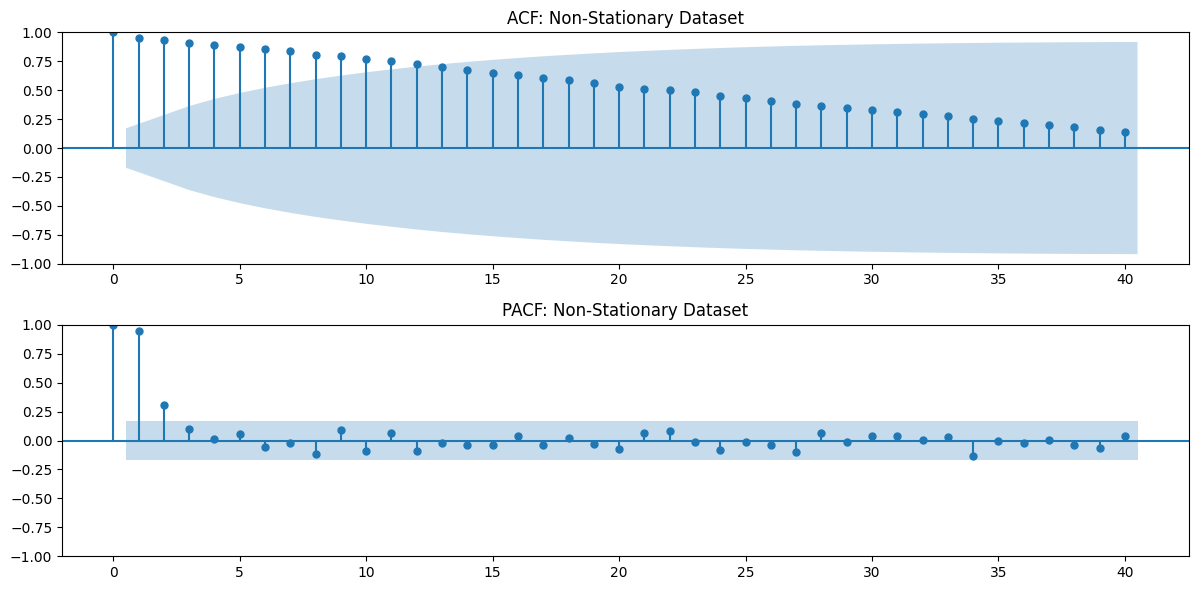

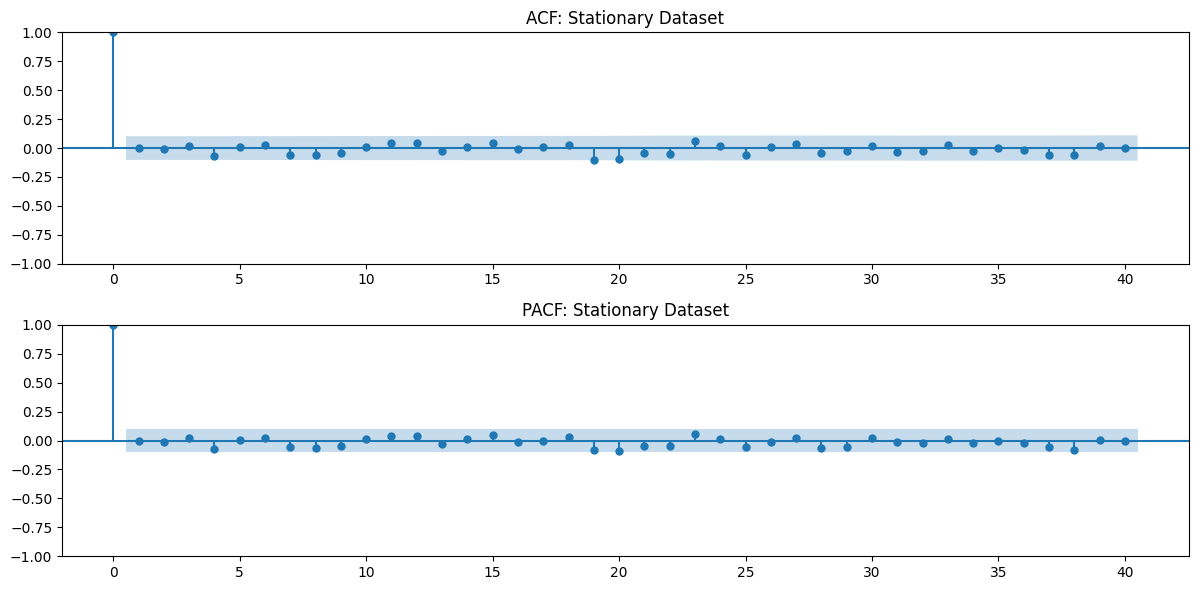

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF Plots for Non-Stationary Dataset
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(non_stationary_data['Sales'], ax=plt.gca(), lags=40)
plt.title('ACF: Non-Stationary Dataset')

plt.subplot(2, 1, 2)
plot_pacf(non_stationary_data['Sales'], ax=plt.gca(), lags=40)
plt.title('PACF: Non-Stationary Dataset')
plt.tight_layout()
plt.show()

# ACF and PACF Plots for Stationary Dataset
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(stationary_data['TempAnomalies'], ax=plt.gca(), lags=40)
plt.title('ACF: Stationary Dataset')

plt.subplot(2, 1, 2)
plot_pacf(stationary_data['TempAnomalies'], ax=plt.gca(), lags=40)
plt.title('PACF: Stationary Dataset')
plt.tight_layout()
plt.show()

#### Insights

**1. Non-Stationary Dataset (Monthly Sales):**

***ACF***
- The ACF plot shows a slow decay in the correlations as the lag increases. This is a strong indicator of non-stationarity. The presence of significant spikes at multiple lags further supports this.

***PACF***
- The PACF plot shows a few significant spikes at lower lags, suggesting that the data might be autoregressive (AR) in nature. However, the presence of significant spikes in both ACF and PACF can be indicative of non-stationarity.

**2. Stationary Dataset (Daily Temperature Anomalies):**

***ACF***
- The ACF plot shows a rapid decay in the correlations, quickly approaching zero. This is the main characteristic of stationary data.

***PACF***
- The PACF plot also shows a rapid decay in the correlations, with only a few significant spikes at lower lags. This further supports the stationarity of the data.



### Rolling Statistics

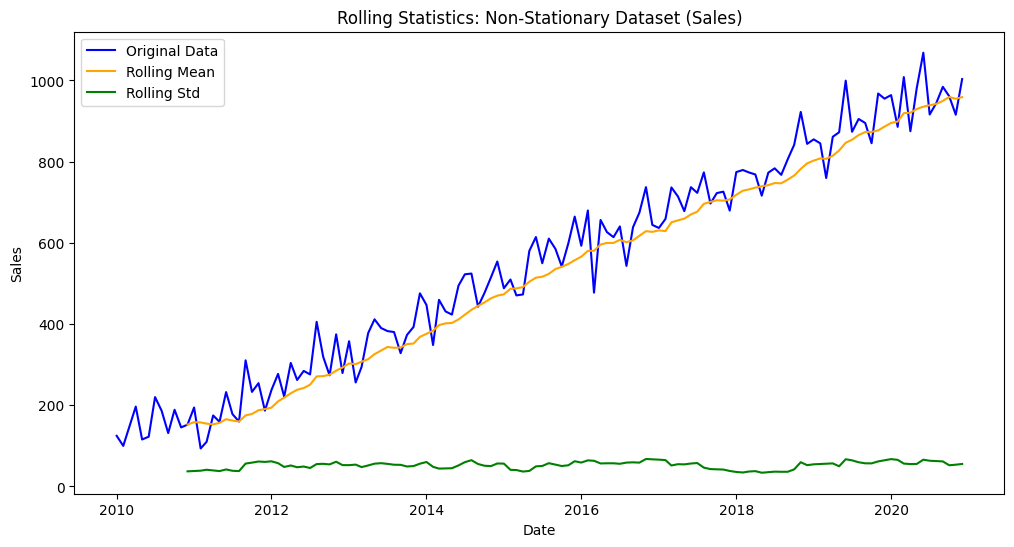

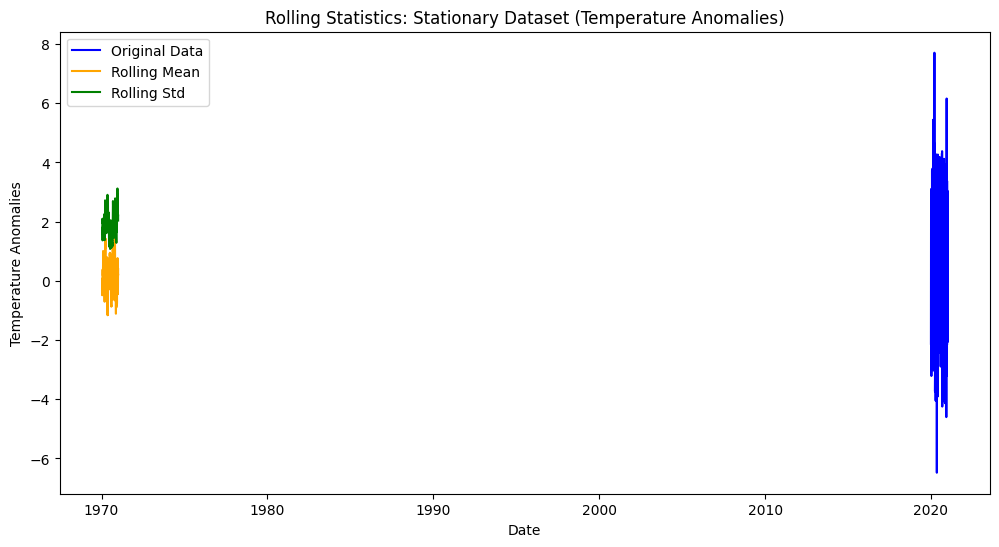

In [6]:
# Rolling Statistics for Non-Stationary Data
rolling_mean_non_stat = non_stationary_data['Sales'].rolling(window=12).mean()
rolling_std_non_stat = non_stationary_data['Sales'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(non_stationary_data['Date'], non_stationary_data['Sales'], label='Original Data', color='blue')
plt.plot(non_stationary_data['Date'], rolling_mean_non_stat, label='Rolling Mean', color='orange')
plt.plot(non_stationary_data['Date'], rolling_std_non_stat, label='Rolling Std', color='green')
plt.title('Rolling Statistics: Non-Stationary Dataset (Sales)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Rolling Statistics for Stationary Data
rolling_mean_stat = stationary_data['TempAnomalies'].rolling(window=12).mean()
rolling_std_stat = stationary_data['TempAnomalies'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(stationary_data['Date'], stationary_data['TempAnomalies'], label='Original Data', color='blue')
plt.plot(rolling_mean_stat, label='Rolling Mean', color='orange')
plt.plot(rolling_std_stat, label='Rolling Std', color='green')
plt.title('Rolling Statistics: Stationary Dataset (Temperature Anomalies)')
plt.xlabel('Date')
plt.ylabel('Temperature Anomalies')
plt.legend()
plt.show()

#### Insights

**1. Non-Stationary Dataset (Monthly Sales):**

***Rolling Mean***
- The rolling mean shows a clear upward trend, indicating that the average sales value is increasing over time. This is a strong characteristic of non-stationarity.

***Rolling Standard Deviation***
- The rolling standard deviation also appears to increase slightly over time, suggesting that the variability of the data is not constant.

**2. Stationary Dataset (Daily Temperature Anomalies):**

***Rolling Mean***
- The rolling mean fluctuates around a relatively constant value, indicating that the average temperature anomaly remains relatively stable over time.


***Rolling Standard Deviation***
- The rolling standard deviation also remains relatively constant, suggesting that the variability of the temperature anomalies does not change significantly over time.

### Augmented Dickey-Fuller (ADF) test

In [45]:
def adf_test(series, dataset_name):
    result = adfuller(series)
    print(f"ADF Test for {dataset_name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    if result[1] < 0.05:
        print("Conclusion: Stationary (Reject the null hypothesis)\n")
    else:
        print("Conclusion: Non-Stationary (Fail to reject the null hypothesis)\n")

# Apply ADF Test
adf_test(non_stationary_data['Sales'], "Non-Stationary Dataset (Sales)")
adf_test(stationary_data['TempAnomalies'], "Stationary Dataset (Temperature Anomalies)")


ADF Test for Non-Stationary Dataset (Sales):
ADF Statistic: 0.0402
p-value: 0.9617
Critical Values:
   1%: -3.4856
   5%: -2.8857
   10%: -2.5797
Conclusion: Non-Stationary (Fail to reject the null hypothesis)

ADF Test for Stationary Dataset (Temperature Anomalies):
ADF Statistic: -19.1506
p-value: 0.0000
Critical Values:
   1%: -3.4484
   5%: -2.8695
   10%: -2.5710
Conclusion: Stationary (Reject the null hypothesis)



#### Insights

**1. Non-Stationary Dataset (Monthly Sales):**

- The high p-value (0.9617) indicates that we fail to reject the null hypothesis of the ADF test, which shows that the data has a unit root and is therefore non-stationary. This is consistent with the visual observation of an upward trend in the sales data.

**2. Stationary Dataset (Daily Temperature Anomalies):**

- The very low p-value (0.0000) indicates that we can reject the null hypothesis of the ADF test. This suggests that the temperature anomalies data does not have a unit root and is likely stationary. This is consistent with the visual observation of fluctuations around a constant mean.
